In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [229]:
df = pd.read_csv('DATA.csv', index_col=0)

In [230]:
df.head()

,quote_date,expiration_C,strike,option_type_C,bid_1545_C,ask_1545_C,expiration_P,option_type_P,bid_1545_P,ask_1545_P,date,rate,implied_S_x,moneyness,implied_S_y
0,2018-01-12,2018-02-09,5400.0,C,1347.0,1368.3,2018-02-09,P,0.05,3.1,2018-01-12,0.0131,6750.221453,1350.221453,6751.233067
1,2018-01-12,2018-02-09,5500.0,C,1248.0,1269.0,2018-02-09,P,0.25,3.7,2018-01-12,0.0131,6750.563054,1250.563054,6751.233067
2,2018-01-12,2018-02-09,5600.0,C,1151.6,1165.9,2018-02-09,P,0.65,4.2,2018-01-12,0.0131,6750.254655,1150.254655,6751.233067
3,2018-01-12,2018-02-09,5700.0,C,1052.4,1066.7,2018-02-09,P,1.70,4.3,2018-01-12,0.0131,6750.371256,1050.371256,6751.233067
4,2018-01-12,2018-02-09,5800.0,C,953.1,967.4,2018-02-09,P,2.40,5.1,2018-01-12,0.0131,6750.212857,950.212857,6751.233067


In [231]:
df['expiration_C']=pd.to_datetime(df['expiration_C'])

In [232]:
nasdaq = pd.read_csv('NASDAQ.csv')

In [233]:
nasdaq.head()

,Date,Close/Last,Open,High,Low
0,01/03/2024,16368.49,16413.26,16471.08,16352.14
1,01/02/2024,16543.94,16667.30,16686.60,16453.15
2,12/29/2023,16825.93,16902.44,16919.51,16757.89
3,12/28/2023,16898.47,16963.52,16969.17,16891.32
4,12/27/2023,16906.80,16896.14,16922.01,16859.55


In [234]:
nasdaq['Date']=pd.to_datetime(nasdaq['Date'])

In [235]:
newdf = pd.merge(df, nasdaq, how='left', left_on='expiration_C', right_on='Date')

In [236]:
newdf['expiration_C'].nunique()

56

In [237]:
# nasdaq_vol = pd.read_csv('NASDAQ_vol.csv')  

In [238]:
# nasdaq_vol['Date_vol']=pd.to_datetime(nasdaq_vol['Date'])
# nasdaq_vol['vol'] = nasdaq_vol['Close/Last']

In [239]:
# newdf = pd.merge(newdf, nasdaq_vol, how='left', left_on='expiration_C', right_on='Date_vol')

In [240]:
newdf['strike_adj'] = newdf['strike'] / newdf['implied_S_y']

In [241]:
newdf['strike_adj'].describe()

count    10898.000000
mean         0.990330
std          0.155167
min          0.504835
25%          0.879193
50%          0.989446
75%          1.096986
max          1.535656
Name: strike_adj, dtype: float64

In [308]:
newdf['max'] = np.maximum(newdf['Close/Last']-newdf['strike'],0)

In [309]:
newdf[['max', 'Close/Last', 'strike']]

,max,Close/Last,strike
0,1012.68,6412.68,5400.0
1,912.68,6412.68,5500.0
2,812.68,6412.68,5600.0
3,712.68,6412.68,5700.0
4,612.68,6412.68,5800.0
...,...,...,...
10893,0.00,11563.33,14600.0
10894,0.00,11563.33,14700.0
10895,0.00,11563.33,14800.0
10896,0.00,11563.33,14900.0


In [253]:
newdf['pnl_long_Call'] =  np.max(newdf['Close/Last']-newdf['strike'],0)-(newdf['bid_1545_C']+newdf['ask_1545_C'])/2
newdf['pnl_long_Put'] =  np.max(newdf['strike']-newdf['Close/Last'],0)-(newdf['bid_1545_C']+newdf['ask_1545_C'])/2
newdf['pnl_short_Call'] = (newdf['bid_1545_C']+newdf['ask_1545_C'])/2 - np.max(newdf['strike']-newdf['Close/Last'],0)
newdf['pnl_short_Put'] =  (newdf['bid_1545_C']+newdf['ask_1545_C'])/2 - np.max(newdf['Close/Last']-newdf['strike'],0)

In [303]:
newdf[['quote_date', 'Close/Last', 'strike', 'bid_1545_C', 'ask_1545_C', 'pnl_long_Call', 'pnl_long_Put', 'pnl_short_Call', 'pnl_short_Put']].head()

,quote_date,Close/Last,strike,bid_1545_C,ask_1545_C,pnl_long_Call,pnl_long_Put,pnl_short_Call,pnl_short_Put
0,2018-01-12,6412.68,5400.0,1347.0,1368.3,4580.19,5809.53,-5809.53,-4580.19
1,2018-01-12,6412.68,5500.0,1248.0,1269.0,4679.34,5908.68,-5908.68,-4679.34
2,2018-01-12,6412.68,5600.0,1151.6,1165.9,4779.09,6008.43,-6008.43,-4779.09
3,2018-01-12,6412.68,5700.0,1052.4,1066.7,4878.29,6107.63,-6107.63,-4878.29
4,2018-01-12,6412.68,5800.0,953.1,967.4,4977.59,6206.93,-6206.93,-4977.59


In [254]:
newdf.expiration_C

0       2018-02-09
1       2018-02-09
2       2018-02-09
3       2018-02-09
4       2018-02-09
           ...    
10893   2022-12-09
10894   2022-12-09
10895   2022-12-09
10896   2022-12-09
10897   2022-12-09
Name: expiration_C, Length: 10898, dtype: datetime64[ns]

In [255]:
newdf.strike.value_counts()

8000.0    35
9000.0    34
8500.0    34
8100.0    33
8200.0    33
          ..
8770.0     1
8760.0     1
8740.0     1
8730.0     1
9370.0     1
Name: strike, Length: 861, dtype: int64

In [256]:
print(len(newdf[newdf['expiration_C']=='2018-02-09']))
print(len(newdf[newdf['expiration_C']=='2022-12-09']))

118
241


In [137]:
# def adj_strike_min(group):
#     return group['strike_adj'].min()

# def adj_strike_max(group):
#     return group['strike_adj'].max()

# subset_min = newdf.groupby("quote_date").apply(adj_strike_min).max()
# subset_max = newdf.groupby("quote_date").apply(adj_strike_max).min()
# print(f'The overlapped interval is ({subset_min:.3}, {subset_max:.3})')

The overlapped interval is (0.8, 1.09)


In [138]:
# newdf = newdf[(newdf['strike_adj']>=subset_min) & (newdf['strike_adj']<=subset_max)]    

In [257]:
newdf.groupby("quote_date").size().min()

67

In [258]:
# uniformly draw 41 samples of strike_adj from each date
sample_size = 67
newdf_sampled = newdf.groupby('quote_date').apply(lambda x: x.sample(n=sample_size, random_state=42)).reset_index(drop=True)

In [259]:
# rank the strike_adj within each date
newdf_sampled['strike_adj_rank'] = newdf_sampled.groupby('quote_date')['strike_adj'].rank()

In [112]:
# # check for 2018-01-12
# newdf_sampled[newdf_sampled['quote_date']=='2018-01-12'].sort_values('strike_adj')

In [248]:
# newdf_sampled

In [299]:
pnl = pd.DataFrame(index=newdf_sampled['quote_date'].unique())

for i in range(1, 68):
    pnl[f'long_Call_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_long_Call']].set_index('quote_date')
    pnl[f'long_Put_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_long_Put']].set_index('quote_date')
    pnl[f'short_Call_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_short_Call']].set_index('quote_date')
    pnl[f'short_Put_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_short_Put']].set_index('quote_date')

/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_6246/244045367.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pnl[f'long_Call_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_long_Call']].set_index('quote_date')
/var/folders/jb/bxbmc2q970l2l1j4xlhcq9980000gn/T/ipykernel_6246/244045367.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pnl[f'long_Put_{i}'] = newdf_sampled[newdf_sampled['strike_adj_rank']==i][['quote_date','pnl_long_Put']].set_index('quote_date')
/var/folders/jb/bxbmc2

In [2]:
# pnl

In [3]:
pnl_1 = pd.read_csv('/Users/may/Downloads/winter/option_PNL.csv')

In [4]:
pnl_1.set_index('quote_date', inplace=True)

In [5]:
pnl_1

,1_C,2_C,3_C,4_C,5_C,6_C,7_C,8_C,9_C,10_C,11_C,12_C,13_C,14_C,15_C,16_C,17_C,18_C,19_C,20_C,21_C,22_C,23_C,24_C,25_C,26_C,27_C,28_C,29_C,30_C,31_C,32_C,33_C,34_C,35_C,36_C,37_C,38_C,39_C,40_C,41_C,42_C,43_C,44_C,45_C,46_C,47_C,48_C,49_C,50_C,51_C,52_C,53_C,54_C,55_C,56_C,57_C,58_C,59_C,60_C,61_C,62_C,63_C,64_C,65_C,66_C,67_C,1_P,2_P,3_P,4_P,5_P,6_P,7_P,8_P,9_P,10_P,11_P,12_P,13_P,14_P,15_P,16_P,17_P,18_P,19_P,20_P,21_P,22_P,23_P,24_P,25_P,26_P,27_P,28_P,29_P,30_P,31_P,32_P,33_P,34_P,35_P,36_P,37_P,38_P,39_P,40_P,41_P,42_P,43_P,44_P,45_P,46_P,47_P,48_P,49_P,50_P,51_P,52_P,53_P,54_P,55_P,56_P,57_P,58_P,59_P,60_P,61_P,62_P,63_P,64_P,65_P,66_P,67_P,1_C_S,2_C_S,3_C_S,4_C_S,5_C_S,6_C_S,7_C_S,8_C_S,9_C_S,10_C_S,11_C_S,12_C_S,13_C_S,14_C_S,15_C_S,16_C_S,17_C_S,18_C_S,19_C_S,20_C_S,21_C_S,22_C_S,23_C_S,24_C_S,25_C_S,26_C_S,27_C_S,28_C_S,29_C_S,30_C_S,31_C_S,32_C_S,33_C_S,34_C_S,35_C_S,36_C_S,37_C_S,38_C_S,39_C_S,40_C_S,41_C_S,42_C_S,43_C_S,44_C_S,45_C_S,46_C_S,47_C_S,48_C_S,49_C_S,50_C_S,51_C_S,52_C_S,53_C_S,54_C_S,55_C_S,56_C_S,57_C_S,58_C_S,59_C_S,60_C_S,61_C_S,62_C_S,63_C_S,64_C_S,65_C_S,66_C_S,67_C_S,1_P_S,2_P_S,3_P_S,4_P_S,5_P_S,6_P_S,7_P_S,8_P_S,9_P_S,10_P_S,11_P_S,12_P_S,13_P_S,14_P_S,15_P_S,16_P_S,17_P_S,18_P_S,19_P_S,20_P_S,21_P_S,22_P_S,23_P_S,24_P_S,25_P_S,26_P_S,27_P_S,28_P_S,29_P_S,30_P_S,31_P_S,32_P_S,33_P_S,34_P_S,35_P_S,36_P_S,37_P_S,38_P_S,39_P_S,40_P_S,41_P_S,42_P_S,43_P_S,44_P_S,45_P_S,46_P_S,47_P_S,48_P_S,49_P_S,50_P_S,51_P_S,52_P_S,53_P_S,54_P_S,55_P_S,56_P_S,57_P_S,58_P_S,59_P_S,60_P_S,61_P_S,62_P_S,63_P_S,64_P_S,65_P_S,66_P_S,67_P_S
quote_date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-12,-334.32,-343.42,-344.52,-347.02,-349.42,-351.62,-355.22,-359.22,-360.02,-361.32,-354.40,-349.80,-345.20,-336.10,-327.80,-309.90,-305.50,-300.60,-292.30,-283.10,-274.50,-265.80,-261.70,-257.70,-249.30,-240.80,-232.50,-224.40,-220.40,-216.50,-208.50,-200.50,-181.30,-177.70,-170.20,-155.90,-141.90,-122.40,-116.10,-113.10,-110.10,-87.80,-85.30,-82.50,-63.30,-59.10,-54.70,-50.90,-48.40,-43.10,-41.60,-38.30,-32.40,-28.30,-24.90,-18.60,-18.00,-13.80,-11.00,-4.20,-3.30,-2.55,-1.45,-1.05,-0.05,0.00,0.00,-0.05,-4.70,-5.90,-7.50,-9.50,-11.20,-14.80,-16.60,-17.40,-18.10,-11.68,-6.98,-2.68,6.92,15.92,33.82,37.52,41.92,50.72,59.52,68.22,77.72,82.02,85.42,94.82,103.22,111.32,119.52,123.62,127.62,136.02,144.02,162.62,167.12,174.52,189.02,203.22,223.22,229.62,232.72,235.72,258.72,262.02,264.52,283.72,288.12,292.52,296.52,300.42,306.02,307.62,310.72,317.02,319.82,324.42,331.32,332.02,336.32,339.32,347.72,349.32,350.12,354.62,354.82,356.52,357.72,357.92,355.62,357.62,358.62,359.92,362.12,364.22,367.42,368.72,369.32,370.02,363.60,359.00,354.50,345.40,336.20,318.20,313.80,309.40,300.50,291.90,283.10,274.50,270.40,266.40,257.90,249.50,240.70,232.90,228.80,224.80,216.60,208.70,189.20,185.60,177.90,163.50,149.30,129.20,122.90,119.80,116.80,93.90,91.20,88.50,69.40,64.70,60.40,56.40,51.60,46.30,44.60,41.40,35.50,31.60,28.00,21.70,20.80,17.00,13.90,6.70,5.80,5.00,4.00,3.30,2.60,1.25,1.10,3.10,7.50,8.60,10.30,12.20,14.10,17.80,20.40,21.00,21.90,15.38,10.78,6.28,-2.92,-11.82,-29.82,-34.02,-38.52,-47.32,-56.12,-64.92,-73.42,-77.72,-81.92,-90.42,-98.82,-107.12,-115.52,-119.42,-123.42,-131.42,-139.42,-158.72,-161.12,-168.52,-183.32,-197.02,-216.92,-223.22,-226.32,-229.42,-252.22,-254.42,-257.22,-276.52,-280.82,-284.52,-288.82,-292.52,-297.92,-299.32,-302.22,-308.22,-312.22,-315.52,-321.42,-322.72,-326.32,-329.52,-335.12,-335.32,-336.02,-333.32,-334.32,-335.32,-336.32,-336.52
2018-02-09,708.08,707.48,704.08,702.88,701.48,699.88,697.98,692.98,689.98,682.68,681.38,671.98,668.08,663.88,656.78,642.28,638.98,619.48,605.08,594.28,582.18,537.28,533.78,517.78,507.78,427.08,415.18,403.08,383.98,377.38,341.08,325.18,317.68,310.08,278.48,244.6

In [328]:
pip install cvxpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Sigma

In [281]:
len(mu)

134

In [267]:
Sigma.shape

(268, 268)

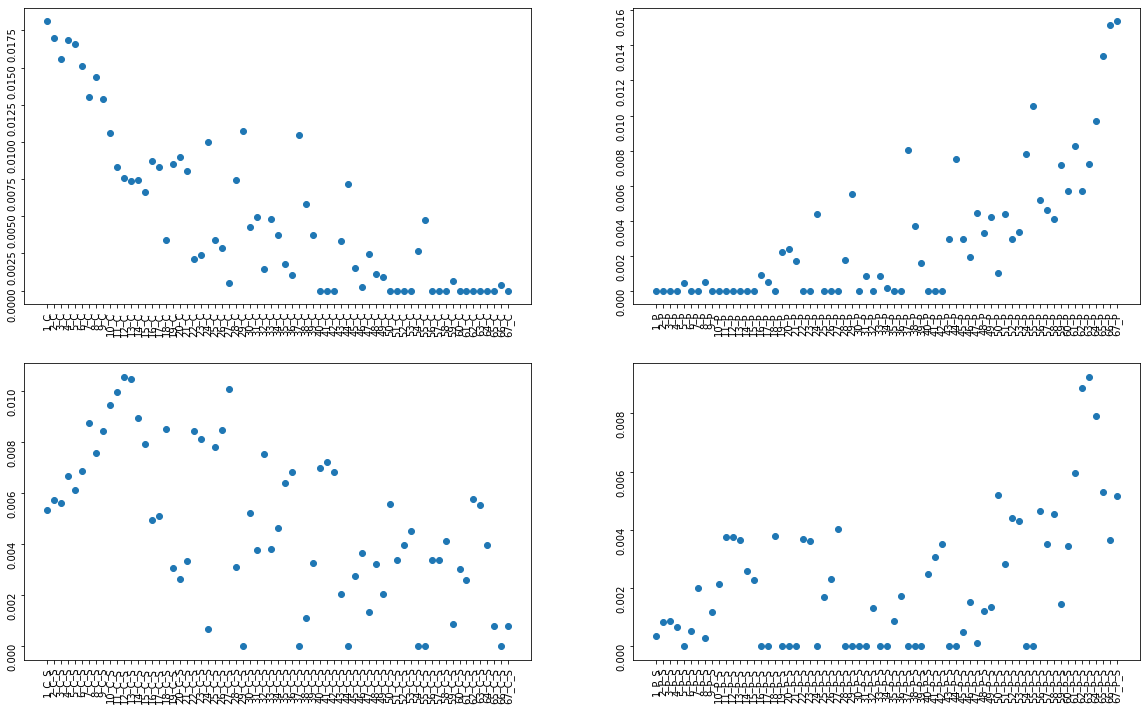

In [7]:
import numpy as np
import cvxpy as cp

# Generate Sigma as a random PSD n*n matrix,  would be substituded by the covariance matrix
# # mu as a random n-vector, would be substituded by the expected return
# for lam in [0.1, 1, 10, 100]:
#   for gamma in [0.1, 1, 10, 100, 200]:
mu = pnl_1.mean().to_numpy()
n = len(mu)
Sigma = pnl_1.cov()
gamma = 1.
lam = 500.
Sigma_1 = Sigma + lam * np.identity(n)
Sigma_1 = cp.psd_wrap(Sigma_1)
# constraints 
# h=0_n, A=1_n, b=1
# Gw >= h equiv to w_i>=0 for all i
# Aw = b equiv to sum(w_i)=1
h = np.zeros(n)
A = np.ones(n)
b = 1

# Define and solve the CVXPY problem.
w = cp.Variable(n)
prob = cp.Problem(cp.Minimize((1/2) * gamma * cp.quad_form(w, Sigma_1) - mu.T @ w),
                 [
                    w >= h,
                  A.T @ w == b
                  ]
                  )
prob.solve()

# # Print result.
# print("\nThe optimal value is", prob.value)
# print("A solution w is")
# print(w.value)

# graph weights vs strike, see if at 1 it is a peak/valley
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,12))
ax[0][0].scatter(pnl_1.columns[:67], w.value[:67])
ax[0][0].tick_params(labelrotation=90)

ax[0][1].scatter(pnl_1.columns[67:134], w.value[67:134])
ax[0][1].tick_params(labelrotation=90)

ax[1][0].scatter(pnl_1.columns[134:201], w.value[134:201])
ax[1][0].tick_params(labelrotation=90)

ax[1][1].scatter(pnl_1.columns[201:], w.value[201:])
ax[1][1].tick_params(labelrotation=90)
plt.show()

In [284]:
pnl_1.columns

Index(['1_C', '2_C', '3_C', '4_C', '5_C', '6_C', '7_C', '8_C', '9_C', '10_C',
       ...
       '58_P', '59_P', '60_P', '61_P', '62_P', '63_P', '64_P', '65_P', '66_P', '67_P'], dtype='object', length=134)

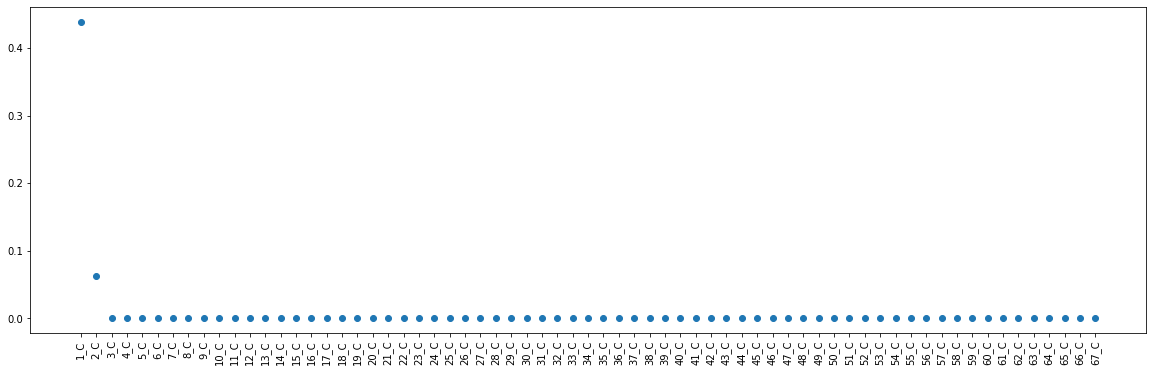

In [293]:
# graph weights vs strike, see if at 1 it is a peak/valley
plt.figure(figsize=(20,6))
plt.scatter(pnl_1.columns[:67], w.value[:67])
plt.xticks(rotation=90)
plt.show()

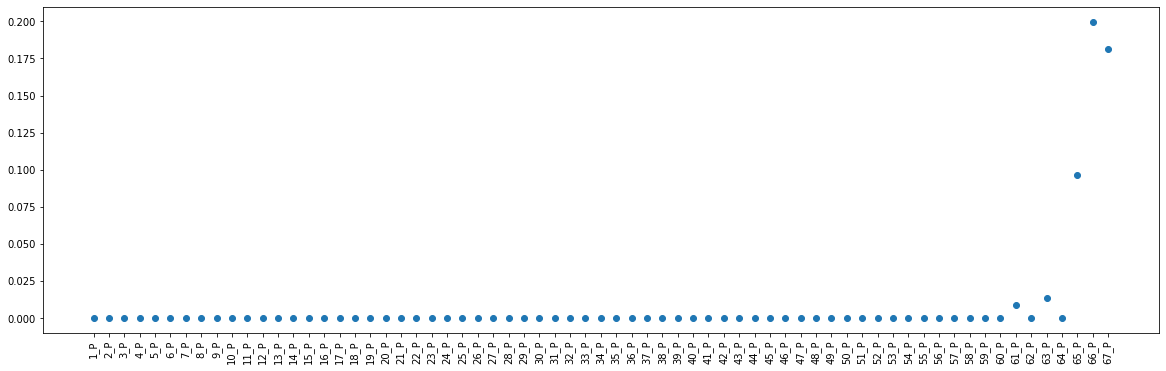

In [289]:
# graph weights vs strike, see if at 1 it is a peak/valley
plt.figure(figsize=(20,6))
plt.scatter(pnl_1.columns[67:], w.value[67:])
plt.xticks(rotation=90)
plt.show()